In [2]:
# Install seaborn package
!pip3 install seaborn

In [3]:
# Import modules from analysis.ipynb

import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [4]:
# Get CSV

non_motorist_df = pd.read_csv("data/Crash_Reporting_-_Non-Motorists_Data.csv")
county_df = pd.read_csv("data/Crash_Reporting_-_Drivers_Data.csv")
state_df = pd.read_csv("data/Maryland_Statewide_Vehicle_Crashes.csv")

In [5]:
# View columns

non_motorist_df.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Pedestrian Type', 'Pedestrian Movement', 'Pedestrian Actions',
       'Pedestrian Location', 'Pedestrian Obeyed Traffic Signal',
       'Pedestrian Visibility', 'At Fault', 'Injury Severity',
       'Safety Equipment', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [6]:
# View columns

county_df.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [7]:
# View columns. Probably not going to use this, doesn't seem to have any extra information that the previous two did not

state_df.columns

Index(['YEAR', 'QUARTER', 'LIGHT_DESC', 'LIGHT_CODE', 'COUNTY_DESC',
       'COUNTY_NO', 'MUNI_DESC', 'MUNI_CODE', 'JUNCTION_DESC', 'JUNCTION_CODE',
       'COLLISION_TYPE_DESC', 'COLLISION_TYPE_CODE', 'SURF_COND_DESC',
       'SURF_COND_CODE', 'LANE_CODE', 'RD_COND_DESC', 'RD_COND_CODE',
       'RD_DIV_DESC', 'RD_DIV_CODE', 'FIX_OBJ_DESC', 'FIX_OBJ_CODE',
       'REPORT_NO', 'REPORT_TYPE', 'WEATHER_DESC', 'WEATHER_CODE', 'ACC_DATE',
       'ACC_TIME', 'LOC_CODE', 'SIGNAL_FLAG_DESC', 'SIGNAL_FLAG',
       'C_M_ZONE_FLAG', 'AGENCY_CODE', 'AREA_CODE', 'HARM_EVENT_DESC1',
       'HARM_EVENT_CODE1', 'HARM_EVENT_DESC2', 'HARM_EVENT_CODE2', 'RTE_NO',
       'ROUTE_TYPE_CODE', 'RTE_SUFFIX', 'LOG_MILE', 'LOGMILE_DIR_FLAG_DESC',
       'LOGMILE_DIR_FLAG', 'MAINROAD_NAME', 'DISTANCE', 'FEET_MILES_FLAG_DESC',
       'FEET_MILES_FLAG', 'DISTANCE_DIR_FLAG', 'REFERENCE_NO',
       'REFERENCE_TYPE_CODE', 'REFERENCE_SUFFIX', 'REFERENCE_ROAD_NAME',
       'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dty

In [8]:
# Reduce the columns in a slow simmer

county_reduced_df = county_df[['Report Number','Local Case Number','ACRS Report Type','Related Non-Motorist','Driver Substance Abuse','Non-Motorist Substance Abuse','Driver At Fault','Injury Severity','Circumstance','Driver Distracted By','Speed Limit']]
non_motorist_reduced_df = non_motorist_df[['Report Number','Local Case Number','Pedestrian Type','Pedestrian Movement','Pedestrian Actions','Pedestrian Location','Pedestrian Obeyed Traffic Signal','Pedestrian Visibility','At Fault']]

In [9]:
# Add columns to a new DataFrame for all visualizations

driver_distraction_df = pd.merge(county_reduced_df,non_motorist_reduced_df,on=['Report Number','Local Case Number'])
driver_distraction_df = driver_distraction_df.rename(columns={'At Fault':'Pedestrian At Fault'})
driver_distraction_df.head()

,Report Number,Local Case Number,ACRS Report Type,Related Non-Motorist,Driver Substance Abuse,Non-Motorist Substance Abuse,Driver At Fault,Injury Severity,Circumstance,Driver Distracted By,Speed Limit,Pedestrian Type,Pedestrian Movement,Pedestrian Actions,Pedestrian Location,Pedestrian Obeyed Traffic Signal,Pedestrian Visibility,Pedestrian At Fault
0,MCP28000052,220014387,Injury Crash,OTHER CONVEYANCE,NONE DETECTED,"N/A, NONE DETECTED",Yes,NO APPARENT INJURY,NaN,LOOKED BUT DID NOT SEE,0,OTHER CONVEYANCE,Walking/Cycling on Sidewalk,NO IMPROPER ACTIONS,DRIVEWAY ACCESS MARKED CROSSWALK,NO PED. SIGNAL,MIXED CLOTHING,No
1,MCP28000052,220014387,Injury Crash,OTHER CONVEYANCE,NONE DETECTED,"N/A, NONE DETECTED",Yes,NO APPARENT INJURY,NaN,LOOKED BUT DID NOT SEE,0,OTHER CONVEYANCE,Walking/Cycling on Sidewalk,NO IMPROPER ACTIONS,DRIVEWAY ACCESS MARKED CROSSWALK,NO PED. SIGNAL,MIXED CLOTHING,No
2,MCP32390021,220015651,Injury Crash,PEDESTRIAN,UNKNOWN,NaN,Yes,NO APPARENT INJURY,NaN,UNKNOWN,25,PEDESTRIAN,Unknown,NO IMPROPER ACTIONS,ON ROADWAY NOT AT CROSSWALK,NaN,MIXED CLOTHING,No
3,EJ78890025,220014084,Injury Crash,PEDESTRIAN,UNKNOWN,NONE DETECTED,Yes,NO APPARENT INJURY,NaN,NOT DISTRACTED,5,PEDESTRIAN,Standing,NO IMPROPER ACTIONS,OTHER,NO PED. SIGNAL,DARK CLOTHING,No
4,MCP2720006P,220015282,Injury Crash,PEDESTRIAN,UNKNOWN,UNKNOWN,Yes,NO APPARENT INJURY,NaN,UNKNOWN,30,PEDESTRIAN,Cross/Enter at Intersection,UNKNOWN,ON ROADWAY AT CROSSWALK,OBEYED PED. SIGNAL,UNKNOWN,No


In [10]:
# CSV transformation for convenience

driver_distraction_df.to_csv("data/Driver_Distraction.csv",index=False)

In [11]:
# New column to determine who is at fault (driver vs. pediatrician)

driver = driver_distraction_df['Driver At Fault']
pedestrian = driver_distraction_df['Pedestrian At Fault']

conditions = [
    (driver.eq('Yes') & pedestrian.eq('No')),
    (driver.eq('No') & pedestrian.eq('Yes')),
    (driver.eq('No') & pedestrian.eq('No')),
    (driver.eq('Yes') & pedestrian.eq('Yes')),
]

choices = [
    'Driver At Fault',
    'Pedestrian At Fault',
    'Neither at Fault',
    'Both at Fault',
]

driver_distraction_df['Who is At Fault'] = np.select(conditions, choices, 'Unknown')

driver_distraction_df['Who is At Fault'].value_counts()

Driver At Fault        358
Pedestrian At Fault    117
Unknown                 75
Neither at Fault        17
Both at Fault           16
Name: Who is At Fault, dtype: int64

In [12]:
# Table to view fault by ACRS type

ACRS_grouped = driver_distraction_df.groupby(['ACRS Report Type','Who is At Fault']).size()
ACRS_grouped

ACRS Report Type       Who is At Fault    
Fatal Crash            Both at Fault            1
                       Driver At Fault          3
                       Pedestrian At Fault      5
                       Unknown                  7
Injury Crash           Both at Fault           15
                       Driver At Fault        327
                       Neither at Fault        15
                       Pedestrian At Fault    103
                       Unknown                 65
Property Damage Crash  Driver At Fault         28
                       Neither at Fault         2
                       Pedestrian At Fault      9
                       Unknown                  3
dtype: int64

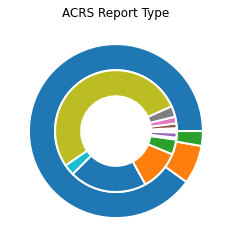

In [13]:
# "ACRS Report Type" pie chart

ACRS_values = driver_distraction_df['ACRS Report Type'].value_counts()
fault_values = driver_distraction_df.groupby(['ACRS Report Type','Who is At Fault']).sum()

width = 0.3
wedge_properties = {'width':width,'edgecolor':'w','linewidth':2}

plt.pie(ACRS_values, labeldistance=0.85,wedgeprops=wedge_properties)
plt.pie(fault_values,labeldistance=0.75,radius=1-width,wedgeprops=wedge_properties)
plt.title("ACRS Report Type")
plt.show()

In [14]:
# Substanse Abuse DF

substance_abuse_df = driver_distraction_df.loc[:,['Driver Substance Abuse','Non-Motorist Substance Abuse']]
substance_abuse_df['Non-Motorist Substance Abuse'] = substance_abuse_df['Non-Motorist Substance Abuse'].replace(['N/A, NONE DETECTED'],'N/A')
substance_abuse_df = substance_abuse_df.fillna("N/A")

substance_abuse_df.head()

,Driver Substance Abuse,Non-Motorist Substance Abuse
0,NONE DETECTED,N/A
1,NONE DETECTED,N/A
2,UNKNOWN,N/A
3,UNKNOWN,NONE DETECTED
4,UNKNOWN,UNKNOWN


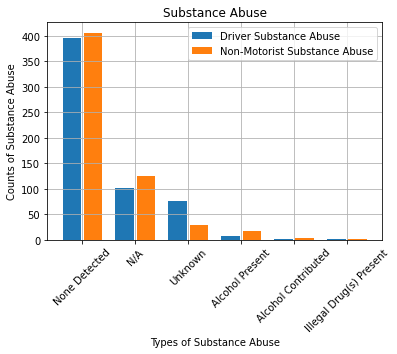

<Figure size 432x288 with 0 Axes>

In [31]:
# Bar Graph to compare substance abuse between driver and non-motorist/pedestrian

dsa = pd.value_counts(substance_abuse_df['Driver Substance Abuse'].values,sort=True)
nmsa = pd.value_counts(substance_abuse_df['Non-Motorist Substance Abuse'].values,sort=True)

x_axis = np.arange(len(dsa))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['None Detected','N/A','Unknown','Alcohol Present','Alcohol Contributed','Illegal Drug(s) Present'],rotation=45)

driver_plot = plt.bar(x_axis-0.2,dsa,width=0.35,label='Driver Substance Abuse')
pedestrian_plot = plt.bar(x_axis+0.2,nmsa,width=0.35,label="Non-Motorist Substance Abuse")

plt.legend(handles=[driver_plot,pedestrian_plot],loc='best')
plt.title("Substance Abuse")
plt.xlabel("Types of Substance Abuse")
plt.ylabel("Counts of Substance Abuse")
plt.grid()

plt.show()
plt.savefig("images/Driver_And_Non-Motorist_Substance_Abuse.png")

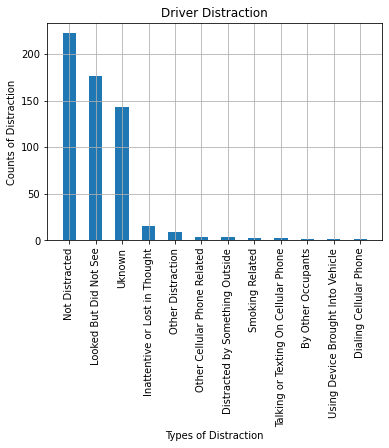

<Figure size 432x288 with 0 Axes>

In [32]:
# Bar Graph to count driver distractions

ddb = pd.value_counts(driver_distraction_df['Driver Distracted By'].values,sort=True)

ddb_x_axis = np.arange(len(ddb))
tick_locations = [value for value in ddb_x_axis]
plt.xticks(tick_locations,['Not Distracted','Looked But Did Not See','Uknown','Inattentive or Lost in Thought','Other Distraction','Other Cellular Phone Related','Distracted by Something Outside','Smoking Related','Talking or Texting On Cellular Phone','By Other Occupants','Using Device Brought Into Vehicle','Dialing Cellular Phone'],rotation='vertical')

plt.bar(ddb_x_axis,ddb,width=0.50)

plt.title("Driver Distraction")
plt.xlabel("Types of Distraction")
plt.ylabel("Counts of Distraction")
plt.grid()

plt.show()
plt.savefig("images/Driver_Distractions.png")

In [30]:
# Table to view the types of distractions with ACRS report type

ACRS_distraction_grouped = driver_distraction_df.groupby(['ACRS Report Type','Driver Distracted By']).size()
ACRS_distraction_grouped

ACRS Report Type       Driver Distracted By                        
Fatal Crash            NOT DISTRACTED                                    5
                       TALKING OR LISTENING TO CELLULAR PHONE            1
                       UNKNOWN                                          10
Injury Crash           BY OTHER OCCUPANTS                                2
                       DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT      4
                       INATTENTIVE OR LOST IN THOUGHT                   13
                       LOOKED BUT DID NOT SEE                          163
                       NOT DISTRACTED                                  195
                       OTHER CELLULAR PHONE RELATED                      4
                       OTHER DISTRACTION                                 9
                       SMOKING RELATED                                   3
                       TALKING OR LISTENING TO CELLULAR PHONE            2
                       UNKNOWN  